In [1]:
# We start by getting access to the drive
from google.colab import drive
drive.mount('/content/drive')
# change directory
%cd '/content/drive/MyDrive'
#  the current directory
%pwd
import os
# this definition allows to read files in a specific path
get_image = lambda route: os.path.join('/content/drive/MyDrive/images', route)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [2]:
import sys,os
# Let's import the python module P0. 
# You must create the directory CV and put inside the file P0.py
# P0.py is the module created from your notebook P0.
path_to_module='/content/drive/MyDrive/CV/'
sys.path.append(os.path.abspath(path_to_module))

import P0

In [3]:
# We import the modules to use
import cv2, numpy as np, math
from matplotlib import pyplot as plt
from PIL import Image as image
# This allows to display images  and to save  them in cells
%matplotlib inline

In [4]:
def readIm(filename, flagColor=1, show=1):
  # TO BE FILLED BY THE STUDENT
  if(flagColor!=1 and flagColor!=0):
    print("Valor no válido de flagColor, se asignará directamente el valor 1")
    flagColor=1
  img = cv2.cvtColor(cv2.imread(filename,flagColor), cv2.COLOR_BGR2RGB)
  if(show==1):
    if(flagColor==0):
      plt.imshow(img, cmap='gray')
    else:
      plt.imshow(img)
  return img# TO BE FILLED BY THE STUDENT

def rangeDisplay01(im, flag_GLOBAL):
  #check image type (grayscale or color)
  bands = len(im.shape)
  max = np.max(im)
  min = np.min(im)
  dif = max-min
  im2 = np.copy(im)
  if (flag_GLOBAL==True or bands!=3):
  # normalize the grayscale image
  # compute range and apply normalization
    im2 = (im2-min)/dif
  else:
    # normalize each band as a grayscale image 
    for k in range(im2.shape[2]):
      max = np.max(im2[:,:,k])
      min = np.min(im[:,:,k])
      dif = max-min
      for i in range(im2.shape[1]): #columns
          for j in range(im2.shape[2]): #RGB
            im2[i][j][k] = (im2[i][j][k]-min)/dif
  return im2

def displayIm(im, title='Result',factor= 1, showFlag=True):  
  # Normalize range
  im2 = np.copy(im)
  im2 = np.asarray(im2,float)
  im2 = rangeDisplay01(im2,True)
  # Display the image
  if len(im2.shape) == 3:
    # im has three channels
    plt.imshow(im2)
  else:
    # im has a single channel
    plt.imshow(im2,cmap='gray')
  figure_size = plt.gcf().get_size_inches()
  plt.gcf().set_size_inches(factor * figure_size)
  plt.title(title) #adding title
  plt.xticks([]), plt.yticks([]) #axis label off
  if showFlag: plt.show()

def displayMI_ES(vim, title="",factor=1):
  maxlinea=6
  size = len(vim)
  if size<=maxlinea:
    out = np.hstack(vim)
    out = np.asarray(out,float)
  else:
    times = round(size/maxlinea)
    rest = size%maxlinea
    if (rest>=maxlinea/2):
      times = times - 1
    aux = []
    for i in range(times):
      auxvim = []
      for j in range(maxlinea):
        auxvim.append(vim[i*maxlinea+j])
      aux.append(np.hstack(auxvim))
    if(rest!=0):
      #We have to add black figures to match the size of the rest of the arrays
      blackimage = np.full((len(vim[0]),len(vim[0][0]),3),[0,0,0])
      auxvim = []
      for i in range(rest):
        auxvim.append(vim[times*maxlinea+i])
      for i in range(maxlinea-rest):
        auxvim.append(blackimage)
      aux.append(np.hstack(auxvim))
    out = np.vstack(aux)
    out = np.asarray(out,float)
  return displayIm(out,title,factor)

In [5]:
def traslacion(im, nt):
  im2 = []
  for i in range(nt):
      im2.append(im)
  return im2

def rotateFigure(im):
  im2 = np.copy(im)
  nrow = im.shape[0]
  ncol = im.shape[1]
  if(len(im.shape)==3):
    nrgb = im.shape[2]
    for i in range(nrow): #filas
      for j in range(ncol): #columnas
        for k in range(nrgb): #RGB
          im2[i][j][k] = im[nrow-1-i][ncol-1-j][nrgb-1-k]
  else:
    for i in range(nrow): #filas
      for j in range(ncol): #columnas
        im2[i][j] = im[nrow-1-i][ncol-1-j]
  im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
  return im2

In [6]:
def buildFriso(im, type):
  if(type=='p1'):
    im2 = traslacion(im,6)
    displayMI_ES(im2, 'p1',2)
  elif(type=='p2'):
    im2 = rotateFigure(im)
    im3 = []
    for i in range(3):
      im3.append(im)
      im3.append(im2)
    # im4 = traslacion(im3,2)
    displayMI_ES(im3, 'p2',2)
  else:
    displayIm(im, 'original')

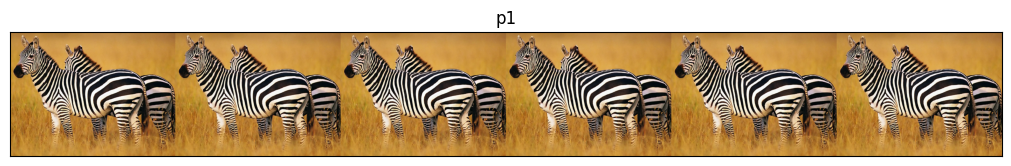

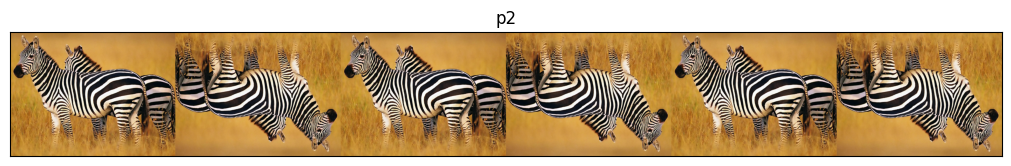

In [7]:
im=readIm(get_image('zebra.jpg'), 1) # 1= a color ;  0 = blanco y negro
buildFriso(im, 'p1')
buildFriso(im, 'p2')